In [23]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [24]:
file_address = 'HaktonData.csv'
data = pd.read_csv(file_address)
data.columns

Index(['Feature', 'gender', 'age', 'weight', 'height', 'health_record',
       'study_rate', 'sport_active', 'enrich_class', 'adopted',
       'diagnosis_record', 'child_birth_country', 'parent1_birth_country',
       'parent2_birth_country', 'parent1_health_record',
       'parent2_health_record', 'devorced\single_parents', 'unemployed_parent',
       'parent_crime_record', 'sallary', 'parents_bachelors', 'vip',
       'social_benefit_record', 'family_members', 'rooms_number', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'bully'],
      dtype='object')

In [25]:
data['bully'].sort_values().unique()

array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

In [26]:
# create the features and labels
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

[1.6524570098029556, 1.6389722608719477, 1.6363913005829136, 1.6400865477665676, 1.6408404353390378, 1.6406896000257774, 1.6406896000257774, 1.6406896000257774]


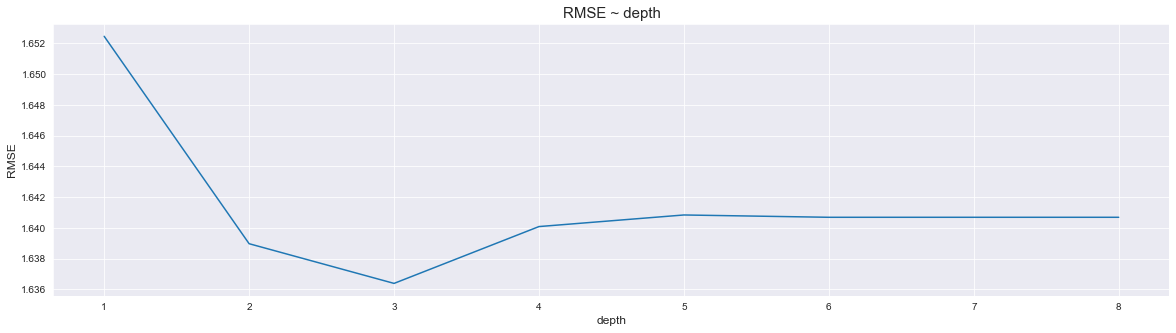

In [27]:
# from 1 to 8
RMSE = []
for i in range(1,9):
    regressor = RandomForestRegressor(n_estimators = 1, max_depth = i, random_state = 0)
    regressor.fit(X, y)

    # predict the result
    pred = regressor.predict(X)
    # calculate the RMSE
    RMSE.append(np.sqrt(mean_squared_error(y, pred)))
    
print(RMSE)
opt_depth = RMSE.index(min(RMSE)) + 1

# show a linear line of the RMSE
sns.set_style('darkgrid')
plt.figure(figsize=(20, 5))
plt.plot(range(1,9), RMSE)
plt.title('RMSE ~ depth', fontsize = 15)
plt.xlabel('depth', fontsize = 12)
plt.ylabel('RMSE', fontsize = 12)
plt.show()

[1.6463054610441925, 1.6307930600388711, 1.6258432697660388, 1.6391904422083785, 1.618959861657847, 1.6265384724714664, 1.6184653051579567, 1.633597931866171, 1.6311520424453325, 1.6403330203969972, 1.6325682941427713, 1.6197809377496841, 1.6533069912460534, 1.6405479527105773, 1.6271893612510697, 1.6270153340762459, 1.627873733100557, 1.6585660128617692, 1.618771682931313, 1.6265692904047084, 1.6346637919329754, 1.6334363246890875, 1.6243725941958316, 1.61649119717093, 1.6430660298618518, 1.6276018941175345, 1.637433830190441, 1.6337441888945274, 1.6296784110919786, 1.6218342677399653, 1.638439166916371, 1.6376341837045594, 1.6590956581253915, 1.6421138652865284, 1.6561246725330068, 1.643059365204941, 1.6462676971645684, 1.6345457144028523, 1.626190496156979, 1.632693217080815, 1.6355336829153373, 1.629212111831027, 1.6433144442532874, 1.631350436244081, 1.617749453157278, 1.6283548298115267, 1.6327167346274618, 1.646044872933859, 1.6632767451743506]


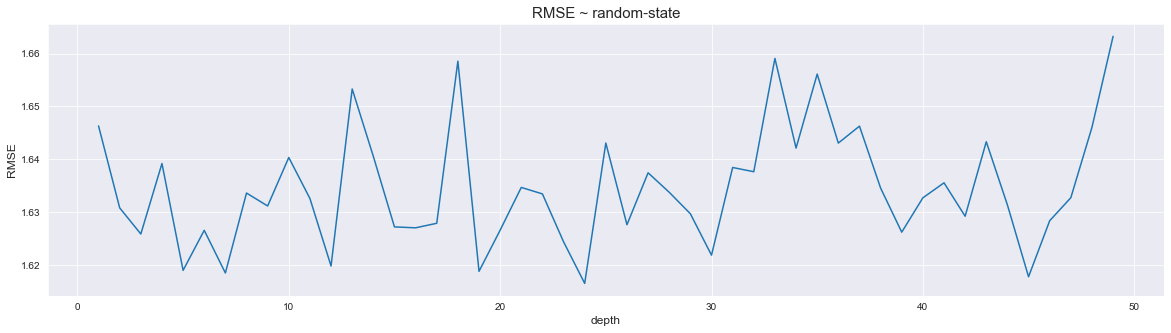

In [28]:
RMSE = []
to = 50
for i in range(1, to):
    regressor = RandomForestRegressor(n_estimators=1, max_depth=opt_depth, random_state=i)
    regressor.fit(X, y)

    # Predict the results
    pred = regressor.predict(X)
    # Calculate the RMSE
    RMSE.append(np.sqrt(mean_squared_error(y, pred)))

print(RMSE)
opt_rnd = RMSE.index(min(RMSE)) + 1

# Plot the line graph of RMSE
sns.set_style('darkgrid')
plt.figure(figsize=(20, 5))
plt.plot(range(1, to), RMSE)
plt.title('RMSE ~ random-state', fontsize = 15)
plt.xlabel('depth', fontsize = 12)
plt.ylabel('RMSE', fontsize = 12)
plt.show()


In [29]:
opt_rnd

24

In [30]:
opt_depth

3

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=opt_rnd)

model = RandomForestRegressor(max_depth=opt_depth, random_state=opt_rnd)
model.fit(X_train, y_train)

# predictions on the test
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.8181103136818177


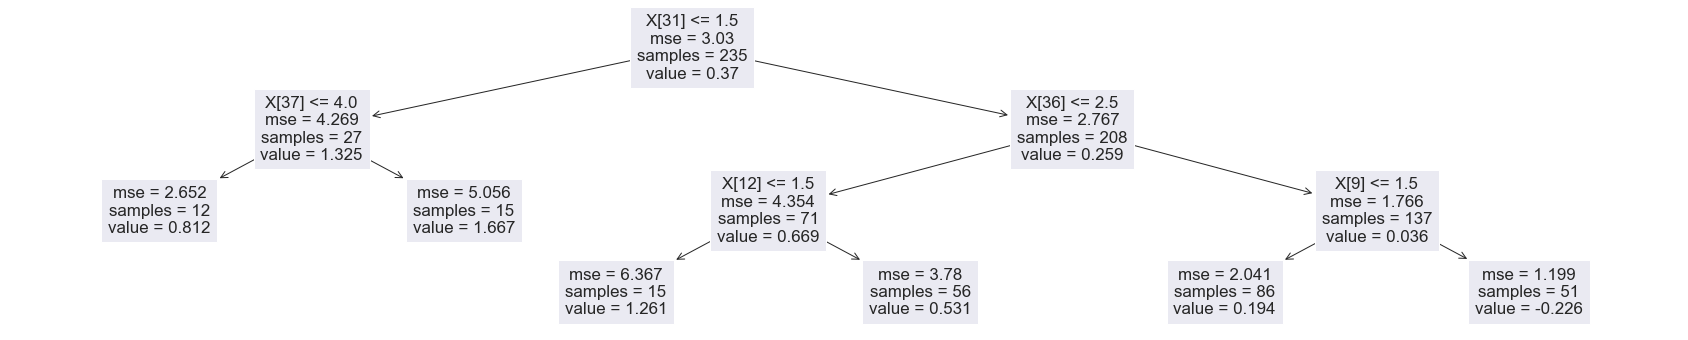

In [32]:
from sklearn.tree import plot_tree
decision_tree = model.estimators_[0]
sns.set_style('darkgrid')
plt.figure(figsize=(30, 6))
plot_tree(decision_tree)

plt.show()

In [33]:
# calculation of the strikes by hamming distance
hamming_distance = sum(el1 != el2 for el1, el2 in zip(y_test, y_pred))
print(hamming_distance)

96


In [34]:
# Check the correction percentages
print(f'{hamming_distance/len(data)*100}%')

20.0%


In [35]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [36]:
model = RandomForestRegressor(max_depth=3)
model.fit(X, y)

# Make predictions on the whole dataset
y_pred = model.predict(X)

In [37]:
data['pred'] = y_pred

# round the data['pred'] column to integer
data['pred'] = data['pred'].round()

In [38]:
data.head(30)

,Feature,gender,age,weight,height,health_record,study_rate,sport_active,enrich_class,adopted,...,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,bully,pred
0,child_1,0,15,91,166,0,60,2,0,0,...,5,3,4,3,2,5,5,1,1,-0.0
1,child_2,1,13,84,141,1,42,2,1,1,...,2,3,5,5,3,4,2,1,-1,-0.0
2,child_3,0,14,53,144,2,88,4,0,1,...,5,4,1,2,4,3,1,3,-1,0.0
3,child_4,1,13,63,153,2,81,4,1,0,...,5,1,1,1,2,3,3,4,0,-0.0
4,child_5,0,15,92,139,0,46,2,0,1,...,3,2,5,1,5,5,5,3,0,0.0
5,child_6,0,13,51,155,2,65,6,1,0,...,3,1,1,3,1,1,4,4,2,0.0
6,child_7,1,14,97,186,1,69,2,0,1,...,4,3,5,2,1,2,2,1,4,1.0
7,child_8,1,16,61,176,0,70,4,1,1,...,5,1,4,5,3,2,2,1,0,0.0
8,child_9,1,16,55,160,2,63,5,0,1,...,1,2,5,5,2,5,5,5,1,1.0
9,child_10,0,15,58,138,2,77,6,1,1,...,5,4,2,5,1,3,1,2,-1,1.0
